In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /Users/kiwi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_description=pd.read_csv('/Users/kiwi/Downloads/Data Scientist/Edureka_Projects/corpusd_cleandata/Extracted_Json.csv')
df_description.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kiwi/Downloads/Data Scientist/Edureka_Projects/corpusd_cleandata/Extracted_Json.csv'

In [3]:
text=df_description['text'][0]
text

'fencing of riat market in kanyikela ward.\n\nmore info : Location : KENYA BidDate : 6/15/2020 Tender Country : KENYA Tender\nType : Tenders Tendering Authority : County Government Of Homa Bay Tendering\nAuthority Address : p.o box: 469-40300, homa-bay county, Financier : Self\nFunded'

In [4]:
import numpy as np
# Split Text into Sentences
from nltk.tokenize import sent_tokenize # Return a sentence-tokenized copy of text
sentences = []
sentences.append(sent_tokenize(text))

sentences = [y for x in sentences for y in x] # flatten list
sentences

['fencing of riat market in kanyikela ward.',
 'more info : Location : KENYA BidDate : 6/15/2020 Tender Country : KENYA Tender\nType : Tenders Tendering Authority : County Government Of Homa Bay Tendering\nAuthority Address : p.o box: 469-40300, homa-bay county, Financier : Self\nFunded']

In [5]:
# Text Preprocessing

# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

clean_sentences

['fencing of riat market in kanyikela ward ',
 'more info   location   kenya biddate             tender country   kenya tender type   tenders tendering authority   county government of homa bay tendering authority address   p o box             homa bay county  financier   self funded']

In [6]:
# Remove stop words

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

clean_sentences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AYAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['fencing riat market kanyikela ward',
 'info location kenya biddate tender country kenya tender type tenders tendering authority county government homa bay tendering authority address p box homa bay county financier self funded']

In [7]:
# Selecting Vocab Size ie size of dictionary. You can take any values. I am taking 10000 to vectorize words in to whole numbers
vocab_size=10000

In [8]:
# creating the one-hot Representation of the sentence
onehot_rep=[one_hot(words,vocab_size) for words in clean_sentences]
print(onehot_rep)

[[2964, 7017, 267, 4439, 1561], [4019, 9646, 2885, 8769, 6246, 6662, 2885, 6246, 3210, 5191, 1476, 3930, 221, 81, 6081, 8152, 1476, 3930, 3703, 6810, 3149, 6081, 8152, 221, 5388, 7032, 7358]]


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding

In [10]:
largest_sen = max(len(sen) for sen in clean_sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 187 words


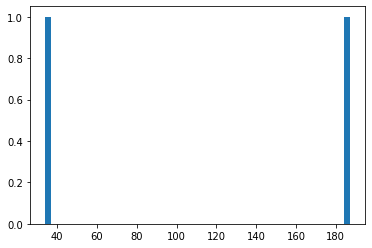

In [11]:
# find the distribution of length of sentences
import matplotlib.pyplot as plt
plt.hist([len(s) for s in clean_sentences], bins=50)
plt.show()

In [12]:
sent_length=100
# padding to get equallength of sentences to fit in the model
embedded_clean_sentence=pad_sequences(onehot_rep,maxlen=sent_length,padding="post") 
print(embedded_clean_sentence)

[[2964 7017  267 4439 1561    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [4019 9646 2885 8769 6246 6662 2885 6246 3210 5191 1476 3930  221   81
  6081 8152 1476 3930 3703 6810 3149 6081 8152  221 5388 7032 7358    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

In [13]:
# lets now set the number of dimensions that we are gonna take as output
dim_out=10

In [14]:
# creating the model
model=Sequential()
model.add(Embedding(vocab_size,dim_out,input_length=sent_length))
model.compile('adam','mse')
model.summary()
          

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 10)           100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.predict(embedded_clean_sentence)

array([[[-0.0332253 ,  0.0198089 , -0.02061443, ..., -0.04215478,
          0.00778729,  0.029387  ],
        [ 0.00206959, -0.00168164, -0.02009743, ..., -0.00664544,
         -0.007052  ,  0.03788393],
        [ 0.00766461, -0.01771767, -0.04538345, ...,  0.0323525 ,
         -0.04570911,  0.01682322],
        ...,
        [ 0.01311196,  0.02363357, -0.01415296, ..., -0.035518  ,
          0.00340338,  0.03723482],
        [ 0.01311196,  0.02363357, -0.01415296, ..., -0.035518  ,
          0.00340338,  0.03723482],
        [ 0.01311196,  0.02363357, -0.01415296, ..., -0.035518  ,
          0.00340338,  0.03723482]],

       [[-0.02960502, -0.02293292,  0.0363924 , ..., -0.01397467,
          0.02008423,  0.0305662 ],
        [-0.00993644,  0.047674  ,  0.04097516, ...,  0.02399175,
         -0.045488  , -0.03902773],
        [ 0.02777313,  0.01495535,  0.02657019, ...,  0.01728738,
         -0.03371479,  0.04582741],
        ...,
        [ 0.01311196,  0.02363357, -0.01415296, ..., -

In [16]:
clean_sentences[1]

'info location kenya biddate tender country kenya tender type tenders tendering authority county government homa bay tendering authority address p box homa bay county financier self funded'

In [17]:
embedded_clean_sentence[1]

array([4019, 9646, 2885, 8769, 6246, 6662, 2885, 6246, 3210, 5191, 1476,
       3930,  221,   81, 6081, 8152, 1476, 3930, 3703, 6810, 3149, 6081,
       8152,  221, 5388, 7032, 7358,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [18]:
arary_1=model.predict(embedded_clean_sentence)

In [19]:
weight=np.sum(arary_1[0])
weight

3.3465972

In [20]:
weight_list=[]
sentence_list=[]
for i in range(0,len(arary_1)):
    weight_list.append(np.sum(arary_1[i]))
    sentence_list.append(clean_sentences[i])

In [21]:
weight_list

[3.3465972, 3.4431014]

In [22]:
sentence_list

['fencing riat market kanyikela ward',
 'info location kenya biddate tender country kenya tender type tenders tendering authority county government homa bay tendering authority address p box homa bay county financier self funded']

In [23]:
df=pd.DataFrame()
df['sentence']=sentence_list
df['weight']=weight_list

In [24]:
df.sort_values(by='weight',ascending=False)

,sentence,weight
1,info location kenya biddate tender country ken...,3.443101
0,fencing riat market kanyikela ward,3.346597


In [25]:
df['sentence'][0]

'fencing riat market kanyikela ward'

In [26]:
vocab_size=10000
dim_out=10
sent_length=100
model=Sequential()
model.add(Embedding(vocab_size,dim_out,input_length=sent_length))
model.compile('adam','mse')

# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

def text_summarization(text):
    sentences = []
    sentences.append(sent_tokenize(text))
    sentences = [y for x in sentences for y in x] # flatten list
    clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")
    clean_sentences = [s.lower() for s in clean_sentences]
    clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

    vocab_size=10000
    onehot_rep=[one_hot(words,vocab_size) for words in clean_sentences]
    sent_length=100
    # padding to get equallength of sentences to fit in the model
    embedded_clean_sentence=pad_sequences(onehot_rep,maxlen=sent_length,padding="post") 
    arary_1=model.predict(embedded_clean_sentence)
    weight_list=[]
    sentence_list=[]
    for i in range(0,len(arary_1)):
        weight_list.append(np.sum(arary_1[i]))
        sentence_list.append(clean_sentences[i])
    df=pd.DataFrame()
    df['sentence']=sentence_list
    df['weight']=weight_list 
    
    df.sort_values(by='weight',ascending=False)
 
    return df['sentence'][0]

In [27]:
df_description['summary']=df_description['text'].apply(text_summarization)
df=df_description[['text','summary']]
df

,text,summary
0,fencing of riat market in kanyikela ward.\n\nm...,fencing riat market kanyikela ward
1,"VILNIUS, Jun 05, BNS - Visitors from low-risk ...",vilnius jun bns visitors low risk countries ou...
2,"Every year, Georgia yard sale shoppers spend t...",every year georgia yard sale shoppers spend fi...
3,Adults have an opportunity to model good onlin...,adults opportunity model good online behavior ...
4,"Company : OFFICE OF XINHE SUB-DISTRICT OFFICE,...",company office xinhe sub district office peopl...
...,...,...
1995,"According to [Kmov.com](http://Kmov.com), an a...",according kmov com http kmov com arrest made m...
1996,"PELHAM  For parent Daniela DeLuca, the Farewe...",pelham parent daniela deluca farewell parade h...
1997,Christine Blackburne The Associated Press\n\nP...,christine blackburne associated press phexxi c...
1998,Renewal of sports hall floor Viktoria elementa...,renewal sports hall floor viktoria elementary ...
